
# **Chapter 3**  
**ATMOS 5340: Environmental Programming and Statistics**  
**John Horel **

Evaluation of persistence forecasts of total seasonal snow at Alta based on snow totals each month earlier during the season or from the previous season

In [1]:
# these are python modules used in the program
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

Alta snowfall
https://utahavalanchecenter.org/alta-monthly-snowfall


Look in the `data` folder at the called `alta_snow.csv`

Open the `alta_snow.csv` file see the column contents and the units.

- The 0th column is the Year at Season End
- The 1st-6th column are the total snowfall during each month from November to April (in inches)
- The 7th column is the Nov-Apr total snowfall (inches)


Begins in the 1946 season and ends in 2022

In [2]:
#read the Alta data directly into a pandas datafram. values in inches
snow_df= pd.read_csv('../data/alta_snow.csv', delimiter=',',index_col=0,header=0)
#display(snow_df)
#convert snow amounts to cm. 
snow_df = snow_df*(2.54)
display(snow_df)

NOV      DEC      JAN     FEB      MAR      APR     TOTAL
Ending Year                                                               
1946         276.860  210.820  214.630  127.00  175.260  140.970  1145.540
1947         175.260  160.020  154.940  134.62  172.720  152.400   949.960
1948         299.720  203.200  116.840  167.64  419.100  187.960  1394.460
1949         180.340  406.400  335.280  147.32  246.380   12.700  1328.420
1950          99.060  347.980  337.820   86.36  276.860   63.500  1211.580
...              ...      ...      ...     ...      ...      ...       ...
2018          38.100  109.220  130.810  167.64  179.070  106.680   731.520
2019         116.840  144.780  215.900  309.88  254.000  161.290  1206.500
2020         224.790  166.370  297.180  184.15  121.920   63.500  1056.640
2021         129.540  129.540  126.492  314.96  134.620  114.300   949.960
2022          42.926  276.098   54.102   52.07  143.002  149.098   717.296

[77 rows x 7 columns]

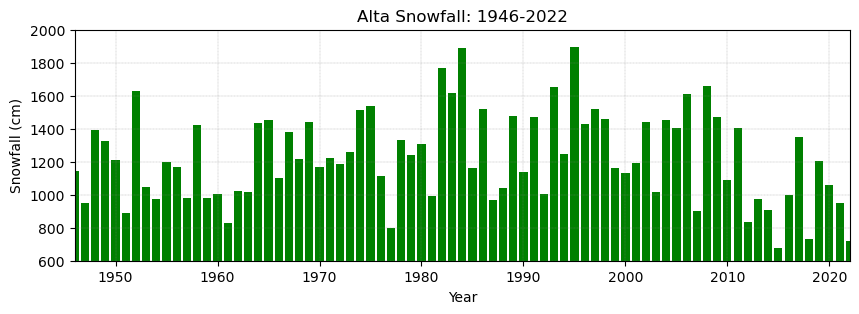

In [3]:
#Create bar plot time series of Alta seasonal total snowfall
#create a fig of Alta snowfall time series
fig,(ax1) = plt.subplots(1,1,figsize=(10,3))
years = snow_df.index.values
ax1.bar(years,snow_df['TOTAL'],color='green')
ax1.set(xlim=(1946,2022),ylim=(600,2000))
ax1.set(xlabel="Year",ylabel="Snowfall (cm)")
#create a list for the times for tick marks on the x axis. This will stop at 2020 (not 2030)
decade_ticks = np.arange(1950,2030,10)
ax1.set(xticks=decade_ticks)
ax1.set(title="Alta Snowfall: 1946-2022")
ax1.grid(linestyle='--', color='grey', linewidth=.2)

#save the figure to 
plt.savefig('alta_snowfall.png')

In [4]:
#accumulate totals each month as the season progresses
#axis=1 means summing over columns for each year
snow_accum = snow_df.cumsum(axis=1)
print(snow_accum)
#don't want to double up the totals so replace with the originals
snow_accum['TOTAL']=snow_df['TOTAL']
print(snow_accum)
#get the column labels
headers = list(snow_accum)
print(headers)

                 NOV      DEC      JAN       FEB       MAR       APR     TOTAL
Ending Year                                                                   
1946         276.860  487.680  702.310   829.310  1004.570  1145.540  2291.080
1947         175.260  335.280  490.220   624.840   797.560   949.960  1899.920
1948         299.720  502.920  619.760   787.400  1206.500  1394.460  2788.920
1949         180.340  586.740  922.020  1069.340  1315.720  1328.420  2656.840
1950          99.060  447.040  784.860   871.220  1148.080  1211.580  2423.160
...              ...      ...      ...       ...       ...       ...       ...
2018          38.100  147.320  278.130   445.770   624.840   731.520  1463.040
2019         116.840  261.620  477.520   787.400  1041.400  1202.690  2409.190
2020         224.790  391.160  688.340   872.490   994.410  1057.910  2114.550
2021         129.540  259.080  385.572   700.532   835.152   949.452  1899.412
2022          42.926  319.024  373.126   425.196   5

['NOV', 'DEC', 'JAN', 'FEB', 'MAR']


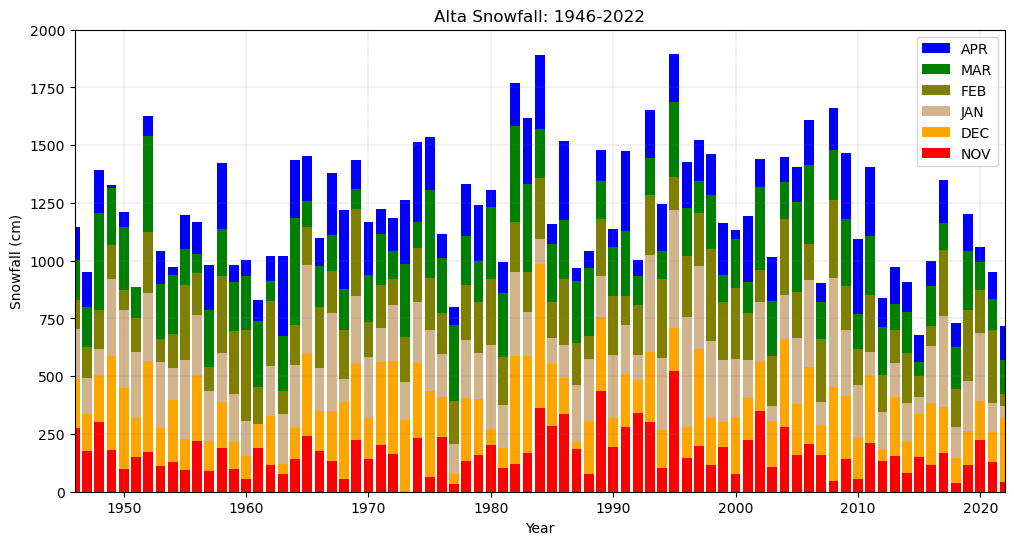

In [5]:
#Create time series of Alta accumulating snowfall each month during each season
#create a list for the times for tick marks on the x axis. This will stop at 2020 (not 2030)

fig,(ax1) = plt.subplots(1,1,figsize=(12,6))
#the earlier bars are plotted on top of the later ones to see them all
ax1.bar(years,snow_accum['APR'], color='b')
ax1.bar(years,snow_accum['MAR'], color='g')
ax1.bar(years,snow_accum['FEB'], color='olive')
ax1.bar(years,snow_accum['JAN'], color='tan')
ax1.bar(years,snow_accum['DEC'], color='orange')
ax1.bar(years,snow_accum['NOV'],color='r')
ax1.set(xlim=(1946,2022),ylim=(0,2000))
ax1.set(xlabel="Year",ylabel="Snowfall (cm)")
ax1.set(xticks=decade_ticks)
ax1.set(title="Alta Snowfall: 1946-2022")
ax1.grid(linestyle='--', color='grey', linewidth=.2)
#have to reverse the headers to match the order plotted
print(headers[0:-2])
headers_mt = headers[0:-1]
headers_r = headers_mt[::-1]
ax1.legend(headers_r)
#save the figure
plt.savefig('alta_snowfall_accum.png')

In [6]:
#years with the max and min totals
#In what year did the max values happen and what were the max values?
#print(snow_df.idxmax(),snow_df.max())
#print(snow_df.idxmin(),snow_df.min())

#compute the max, median, and min snow for each month
snow_max = snow_df.max(axis=0)
snow_med = snow_df.median(axis=0)
snow_min = snow_df.min(axis=0)
print(snow_max,snow_med,snow_min)

#accumulate totals as if the season progressed with the least, median and max amounts each month
snow_max_accum = snow_max.cumsum()
snow_med_accum = snow_med.cumsum()
snow_min_accum = snow_min.cumsum()
#don't want to double up the totals so replace with the originals
snow_max_accum['TOTAL']=snow_max['TOTAL']
snow_med_accum['TOTAL']=snow_med['TOTAL']
snow_min_accum['TOTAL']=snow_min['TOTAL']
print(snow_max_accum,snow_med_accum,snow_min_accum)

NOV       522.986
DEC       621.030
JAN       507.238
FEB       397.764
MAR       464.820
APR       346.202
TOTAL    1893.316
dtype: float64 NOV       158.750
DEC       207.772
JAN       218.440
FEB       197.866
MAR       213.360
APR       149.860
TOTAL    1198.880
dtype: float64 NOV        0.000
DEC       31.242
JAN        2.540
FEB       52.070
MAR       60.960
APR        0.000
TOTAL    679.450
dtype: float64
NOV       522.986
DEC      1144.016
JAN      1651.254
FEB      2049.018
MAR      2513.838
APR      2860.040
TOTAL    1893.316
dtype: float64 NOV       158.750
DEC       366.522
JAN       584.962
FEB       782.828
MAR       996.188
APR      1146.048
TOTAL    1198.880
dtype: float64 NOV        0.000
DEC       31.242
JAN       33.782
FEB       85.852
MAR      146.812
APR      146.812
TOTAL    679.450
dtype: float64


In [7]:
#get some additional stats for each month
#tercile values and median
stats = snow_accum.describe(percentiles=[.33,.50,.66])
print(stats)
#print(snow_accum['NOV'])

              NOV         DEC          JAN          FEB          MAR  \
count   77.000000   77.000000    77.000000    77.000000    77.000000   
mean   170.084338  398.214273   631.378026   840.819169  1060.606688   
std     94.717482  160.733232   205.931445   226.120544   244.573630   
min      0.000000   77.470000   205.740000   392.430000   560.070000   
33%    119.989600  317.621920   556.666400   722.579200   933.754800   
50%    158.750000  383.540000   601.980000   829.310000  1041.400000   
66%    190.906400  448.259200   701.040000   919.601920  1150.315200   
max    522.986000  985.520000  1217.676000  1360.678000  1688.084000   

               APR        TOTAL  
count    77.000000    77.000000  
mean   1227.078948  1227.123481  
std     273.405113   273.420076  
min     679.450000   679.450000  
33%    1060.653200  1059.484800  
50%    1198.880000  1198.880000  
66%    1383.792000  1383.792000  
max    1893.062000  1893.316000  


In [8]:
#count the cases for each month (3rd index in ctr array; iterating over columns) 
# for the predictor/forecast-1st index in ctr array (prior month category of low, mid, or hi precip)
# and for the predictand/observed- 2nd index in ctr array (seasonal total falling in low, mid, or hi terciles)
# 3rd index is the month
ctr = np.zeros((3,3,7))
ih = 0
for h in headers: 
        ctr[0,0,ih] = sum((snow_accum[h]<stats[h]["33%"]) & (snow_accum["TOTAL"]<stats["TOTAL"]["33%"]))
        ctr[1,0,ih] = sum((snow_accum[h]>=stats[h]["33%"]) & (snow_accum[h]<=stats[h]["66%"]) & (snow_accum["TOTAL"]<stats["TOTAL"]["33%"]))
        ctr[2,0,ih] = sum((snow_accum[h]>stats[h]["66%"]) & (snow_accum["TOTAL"]<stats["TOTAL"]["33%"]))
        ctr[0,1,ih] = sum((snow_accum[h]<stats[h]["33%"]) & (snow_accum["TOTAL"]>=stats["TOTAL"]["33%"]) & (snow_accum["TOTAL"]<=stats["TOTAL"]["66%"]))
        ctr[1,1,ih] = sum((snow_accum[h]>=stats[h]["33%"]) & (snow_accum[h]<=stats[h]["66%"]) & (snow_accum["TOTAL"]>=stats["TOTAL"]["33%"]) & (snow_accum["TOTAL"]<=stats["TOTAL"]["66%"]))
        ctr[2,1,ih] = sum((snow_accum[h]>stats[h]["66%"]) & (snow_accum["TOTAL"]>=stats["TOTAL"]["33%"]) & (snow_accum["TOTAL"]<=stats["TOTAL"]["66%"]))
        ctr[0,2,ih] = sum((snow_accum[h]<stats[h]["33%"]) & (snow_accum["TOTAL"]>stats["TOTAL"]["66%"]))
        ctr[1,2,ih] = sum((snow_accum[h]>=stats[h]["33%"]) & (snow_accum[h]<=stats[h]["66%"]) & (snow_accum["TOTAL"]>stats["TOTAL"]["66%"]))
        ctr[2,2,ih] = sum((snow_accum[h]>stats[h]["66%"]) & (snow_accum["TOTAL"]>stats["TOTAL"]["66%"]))
        print(h,ctr[:,:,ih])
        ih=ih+1

print("recognize the ordering. 2 years where TOTAL was low and NOV was high",ctr[2,0,0])

NOV [[14.  8.  4.]
 [10.  8.  7.]
 [ 2.  9. 15.]]
DEC [[16.  8.  2.]
 [ 9. 11.  5.]
 [ 1.  6. 19.]]
JAN [[20.  5.  1.]
 [ 6. 12.  8.]
 [ 0.  8. 17.]]
FEB [[22.  3.  1.]
 [ 4. 16.  5.]
 [ 0.  6. 20.]]
MAR [[23.  3.  0.]
 [ 3. 19.  3.]
 [ 0.  3. 23.]]
APR [[26.  0.  0.]
 [ 0. 25.  0.]
 [ 0.  0. 26.]]
TOTAL [[26.  0.  0.]
 [ 0. 25.  0.]
 [ 0.  0. 26.]]
recognize the ordering. 2 years where TOTAL was low and NOV was high 2.0


Ending Year
1946    False
1947    False
1948    False
1949    False
1950    False
        ...  
2018     True
2019    False
2020    False
2021    False
2022     True
Length: 77, dtype: bool


NameError: name 'max_year' is not defined

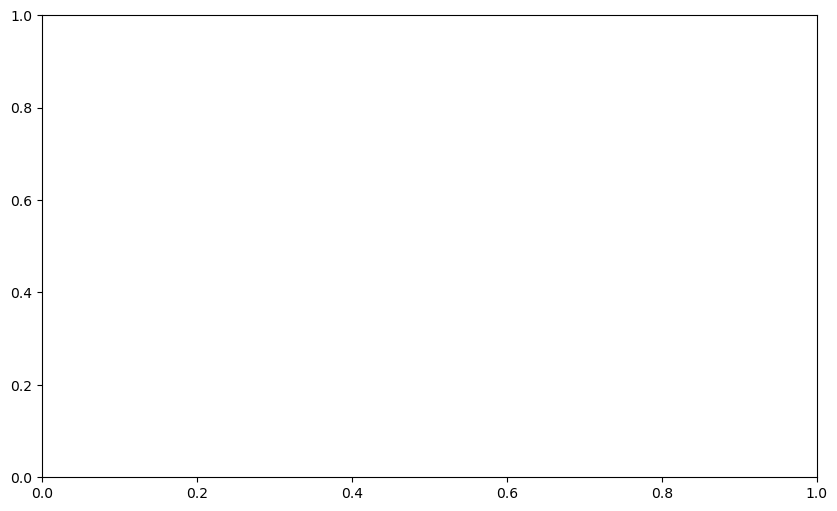

In [9]:
 #given that the season total is below normal, in what years was Nov below normal?
predictor_snow =(snow_accum["NOV"]<stats["NOV"]["33%"]) & (snow_accum["TOTAL"]<stats["TOTAL"]["33%"])
print(predictor_snow)
fig,(ax1) = plt.subplots(1,1,figsize=(10,6))
ax1.plot(predictor_snow,color='green',label=max_year)

ax1.set(xlabel="Year",ylabel="Snowfall (cm)")
ax1.set(title="Alta Snowfall")
#add grids to the plot
ax1.grid(linestyle='--', color='grey', linewidth=.2)
#save the figure to 
plt.savefig('alta_snowfall_below_normal_given_below_normal.png')

print(stats["NOV"]["33%"]/2.54)

In [ ]:
#print out totals relative to the Below normal threshold
low_years= snow_accum["TOTAL"]-stats["TOTAL"]["33%"]
fig,(ax1) = plt.subplots(1,1,figsize=(10,6))
ax1.plot(low_years,color='green',label=max_year)

ax1.set(xlabel="Year",ylabel="Snowfall (cm)")
ax1.set(title="Alta Snowfall")
#add grids to the plot
ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax1.legend()
#save the figure to 
plt.savefig('alta_snowfall_below_normal.png')

In [ ]:
#  predictor-persistence from total observed during previous year. 
#shift the values in the dataframe one year forward
snow_shift=snow_accum.shift(periods=1)
#print(snow_shift)
# starting from what tercle the previous year was in and seeing if those conditions persisted to the next year
ctr_pers = np.zeros((3,3))
ctr_pers[0,0] = sum((snow_shift["TOTAL"]<stats["TOTAL"]["33%"]) & (snow_accum["TOTAL"]<stats["TOTAL"]["33%"]))
ctr_pers[1,0] = sum((snow_shift["TOTAL"]>=stats["TOTAL"]["33%"]) & (snow_shift["TOTAL"]<=stats["TOTAL"]["66%"]) & (snow_accum["TOTAL"]<stats["TOTAL"]["33%"]))
ctr_pers[2,0] = sum((snow_shift["TOTAL"]>stats["TOTAL"]["66%"]) & (snow_accum["TOTAL"]<stats["TOTAL"]["33%"]))
ctr_pers[0,1] = sum((snow_shift["TOTAL"]<stats["TOTAL"]["33%"]) & (snow_accum["TOTAL"]>=stats["TOTAL"]["33%"]) & (snow_accum["TOTAL"]<=stats["TOTAL"]["66%"]))
ctr_pers[1,1] = sum((snow_shift["TOTAL"]>=stats["TOTAL"]["33%"]) & (snow_shift["TOTAL"]<=stats["TOTAL"]["66%"])& (snow_accum["TOTAL"]>=stats["TOTAL"]["33%"]) & (snow_accum["TOTAL"]<=stats["TOTAL"]["66%"]))
ctr_pers[2,1] = sum((snow_shift["TOTAL"]>stats["TOTAL"]["66%"]) & (snow_accum["TOTAL"]>=stats["TOTAL"]["33%"]) & (snow_accum["TOTAL"]<=stats["TOTAL"]["66%"]))
ctr_pers[0,2] = sum((snow_shift["TOTAL"]<stats["TOTAL"]["33%"]) & (snow_accum["TOTAL"]>stats["TOTAL"]["66%"]))
ctr_pers[1,2] = sum((snow_shift["TOTAL"]>=stats["TOTAL"]["33%"]) & (snow_shift["TOTAL"]<=stats["TOTAL"]["66%"]) & (snow_accum["TOTAL"]>stats["TOTAL"]["66%"]))
ctr_pers[2,2] = sum((snow_shift["TOTAL"]>stats["TOTAL"]["66%"]) & (snow_accum["TOTAL"]>stats["TOTAL"]["66%"]))
print(ctr_pers)

In [10]:
#In what year did the max/min seasonal total values happen and what were the values?
max_year = snow_df.idxmax()["TOTAL"]
min_year = snow_df.idxmin()["TOTAL"]
print(max_year,snow_df.max()["TOTAL"])
print(min_year,snow_df.min()["TOTAL"])
#accumulated values during the years with the max and min total
max_year_vals = (snow_accum.loc[snow_accum.idxmax()["TOTAL"]])
min_year_vals = (snow_accum.loc[snow_accum.idxmin()["TOTAL"]])
#print(max_year_vals,min_year_vals,rec_year_vals)
#get the values from the most recent year
recent_year_vals = snow_accum.values[-1]
recent_year = snow_accum['TOTAL'].index[-1]
#print(rec_year,rec_year_vals)

# determine the median values later in the season when Nov is in each tercile
thresh_low = stats["NOV"]["33%"]
median_low_nov = snow_accum[snow_accum["NOV"] < thresh_low].median()
thresh_mid = stats["NOV"]["66%"]
median_mid_nov = snow_accum[((snow_accum["NOV"] >= thresh_low) & (snow_accum["NOV"] <= thresh_mid))] .median()
median_hi_nov = snow_accum[snow_accum["NOV"] > thresh_mid].median()
#print(median_low_nov,median_mid_nov,median_hi_nov)

#new one 2022 given Nov 2022 ~90 in, so group the cases between 85 and 90 inches
median_2023 = snow_accum[((snow_accum["NOV"] >= 215) & (snow_accum["NOV"] <= 240))] .median()

count_2023 = snow_accum[((snow_accum["NOV"] >= 215) & (snow_accum["NOV"] <= 240))] .count()
print(count_2023)

1995 1893.316
2015 679.45
NOV      6
DEC      6
JAN      6
FEB      6
MAR      6
APR      6
TOTAL    6
dtype: int64


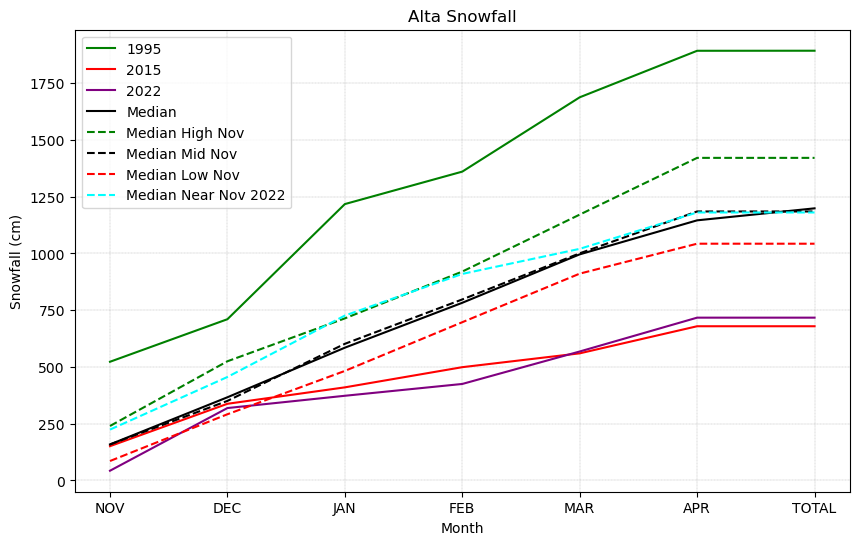

In [12]:
#Create line plot time series of Alta accumulating snowfall each month

fig,(ax1) = plt.subplots(1,1,figsize=(10,6))
ax1.plot(max_year_vals,color='green',label=max_year)
ax1.plot(min_year_vals,color='red',label=min_year)
ax1.plot(recent_year_vals,color='purple',label=recent_year)
ax1.plot(snow_med_accum,color='black',label='Median')
ax1.plot(median_hi_nov,color='green',label='Median High Nov',linestyle='--')
ax1.plot(median_mid_nov,color='black',label='Median Mid Nov',linestyle='--')
ax1.plot(median_low_nov,color='red',label='Median Low Nov',linestyle='--')
ax1.plot(median_2023,color='cyan',label='Median Near Nov 2022',linestyle='--')
ax1.set(xlabel="Month",ylabel="Snowfall (cm)")
ax1.set(title="Alta Snowfall")
#add grids to the plot
ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax1.legend()
#save the figure to 
plt.savefig('alta_snowfall_forecasts.png')

In [ ]:
#use pandas to estimate Total snow from Nov snow
#Pearson correlation: not robust and resitant but most commonly used
r_pc= snow_accum.corr(method='pearson')
print(r_pc)

In [ ]:
#plot totals
print(snow_accum.index.name)
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7.5))
ax1.plot(snow_accum['NOV'],label='NOV')
ax1.plot(snow_accum['TOTAL'],color='red',label='TOTAL')

ax1.set_ylabel('Snowfall (cm)')
ax1.set(xlim=(1945,2023))
ax1.grid()
ax1.legend()

#this will be discussed in Chapter 4
x = snow_accum['NOV']
y = snow_accum['TOTAL']

#get means
xm = np.mean(x)
ym = np.mean(y)

#get st devs
xs = np.std(x)
ys = np.std(y)
print('xm,ym: %.1f %.1f' % (xm,ym))
print('xs,ys: %.1f %.1f' % (xs,ys))
print('Nov plus/minus 1 std dev: %.1f %.1f' % (xm-xs,xm+xs))
print('Total plus/minus 1 std dev: %.1f %.1f' % (ym-ys,ym+ys))


#get anomalies
xprime = x - xm
yprime = y - ym

#standardize anomalies
xstar = xprime/xs
ystar = yprime/ys

#plot anomalies
ax2.plot(xstar,label='NOV')
ax2.plot(ystar,label='TOTAL',color='red')
ax2.legend()
ax2.set(xlim=(1945,2023))
ax2.grid()
ax2.set_ylabel('ST ANOM')
ax2.set_xlabel('Year')
plt.savefig('figure_snow_time_series.png')

In [ ]:
#using linear algebra to estimate Season Total from Nov total
n = len(xprime)
covar = np.dot(xprime,yprime)
varx = np.dot(xprime,xprime)
vary = np.dot(yprime,yprime)
covar = covar/n
varx = varx/n
vary = vary/n


b = covar/varx
r = covar/np.sqrt(varx*vary)
sdx = np.sqrt(varx)
sdy = np.sqrt(vary)#compute estimate of season totals over range of November totals
xhat = np.linspace(-xm,600-xm,100)
yhat = b*xhat
print(r)

XH = xm+xhat
YH = ym+yhat
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7.5))
ax1.scatter(x,y,marker='+')
ax1.plot(XH,YH,color='red')
ax1.grid()
ax1.set_xlabel('NOV')
ax1.set_ylabel('TOTAL')
ax2.scatter(xstar,ystar,marker='+',color='red')
ax2.plot(xhat/xs,yhat/ys)
ax2.grid()
ax2.set_xlabel('NOV')
ax2.set_ylabel('TOTAL')
plt.savefig('figure_alta_regression.png')